#✅**Introducción a la Ciencia de Datos (Optativa) - 2025**


###**Aplicando la técnica de Clustering, K-means**

Las técnicas de Clustering intentan agrupar observaciones similares en función de sus características (features), sin utilizar etiquetas predefinidas (aprendizaje no supervisado).

Para este trabajo práctico, se usarán los datos del archivo [**“mall_customers.csv”**](https://drive.google.com/file/d/1YsvV_JhYcz15dDNxWGLV5-Y9BKZrlzGS/view?usp=sharing). Este archivo contiene los registros de 200 clientes de un centro comercial, donde cada perfil de cliente tiene un ID más 4
características. Las columnas que posee el conjunto de datos son:

- identificación del cliente (**CustomerID**)
- género (**gender**)
- edad (**age**)
- ingresos anuales (k $) (**Annual Income**)
- puntuación de gasto (1-100) (**Spending Score**)

Suponiendo que uno es el propietario del centro comercial y desea comprender a los clientes, para que el equipo de marketing planifique la estrategia de venta, se desea saber lo siguiente:



1. **¿Los clientes con mayor ingresos anuales son los que más gastan?**
2. **¿Los clientes de mayor edad, con mayor ingreso anual, son los que menos gastan?**

**NOTA:** es posible plantear todas las hipótesis que se desee.


####**Ayudas para la resolución del trabajo práctico:**

1. Los algoritmos basados en distancia euclideana, como K-Means, no admiten datos no numéricos. ¿Qué columna quitaría del análisis?
2. Sugerencia: para una mejor visualización, puede realizar un gráfico 3D y otros gráficos 2D.

 a. El gráfico 3D puede servir para comparar las variables "Age", "Annual Income", "Spending Score"

 b. Los gráficos 2D pueden servir hacer comparación entre variables: "Age" vs. "Annual Income", "Age" vs. "Spending Score" y "Annual Income" vs. "Spending Score".

Para los gráficos en 3D, puede utilizar el siguiente segmento de código:
```
from matplotlib import pyplot as plt
...
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, marker='s')
...
```

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [2]:
#1) Cargado de datos
df = pd.read_csv("mall_customers.csv") 

#Seleccion del features del df
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

X = df[features].copy()

print(f"\nCantidad de valores nulos por columna:\n{X.isna().sum()}")


Cantidad de valores nulos por columna:
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Observaciones:**

Como vemos no hay datos faltantes.

2) Limpieza de faltantes

Como K-means no acepta columnas en Nan se debe hacer imputacion de datos.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

X_imp = imputer.fit_transform(X)






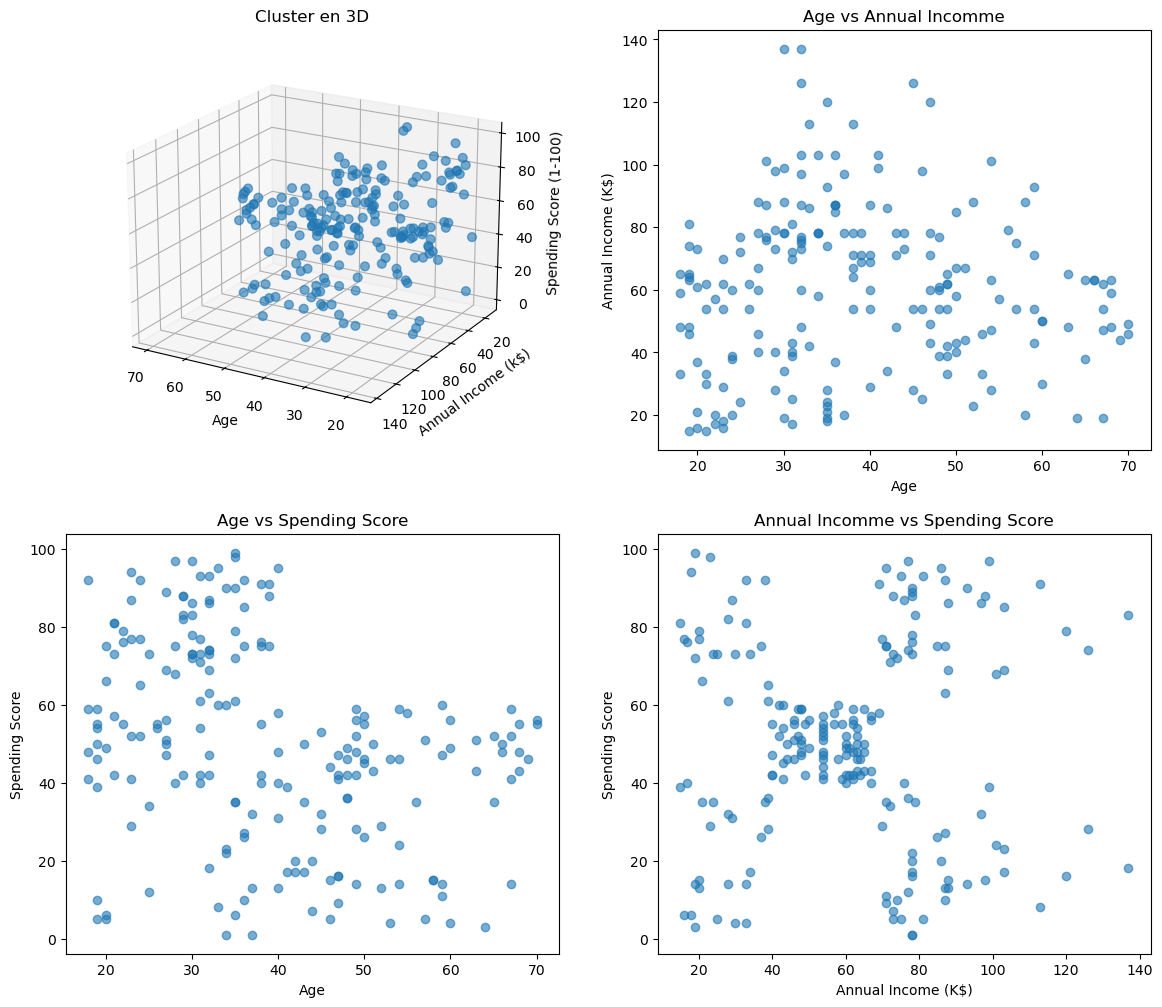

In [14]:
x = df["Age"]
y = df["Annual Income (k$)"]
z = df["Spending Score (1-100)"]

#Crear figura general
fig = plt.figure(figsize=(14,12))

# --- Subplot 1: Grafico 3D completo --
ax1 = fig.add_subplot(2,2,1,projection = '3d')
ax1.scatter3D(x,y,z, s = 40, alpha = 0.6)
ax1.set_xlabel("Age")
ax1.set_ylabel("Annual Income (k$)")
ax1.set_zlabel("Spending Score (1-100)")
ax1.set_title("Cluster en 3D")
ax1.view_init(elev=20, azim=120)

# --- Subplot 2: Age vs Income --
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(x, y, alpha=0.6)
ax2.set_xlabel("Age")
ax2.set_ylabel("Annual Income (K$)")
ax2.set_title("Age vs Annual Incomme")

# --- Subplot 3: Age vs Spending Score --
ax2 = fig.add_subplot(2,2,3)
ax2.scatter(x, z, alpha=0.6)
ax2.set_xlabel("Age")
ax2.set_ylabel("Spending Score")
ax2.set_title("Age vs Spending Score")

# --- Subplot 4: Age vs Income --
ax2 = fig.add_subplot(2,2,4)
ax2.scatter(y, z, alpha=0.6)
ax2.set_xlabel("Annual Income (K$)")
ax2.set_ylabel("Spending Score")
ax2.set_title("Annual Incomme vs Spending Score")

plt.show()

In [15]:
# Calcular los cuartiles y el RI
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar outliers
outliers = ((X < lower_bound) | (X > upper_bound))

# Mostrar cuántos outliers hay por columna
print("Cantidad de outliers por variable:")
print(outliers.sum())

# Filas que tienen al menos un outlier
outlier_rows = X[outliers.any(axis=1)]
outlier_rows.head()


Cantidad de outliers por variable:
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64


,Age,Annual Income (k$),Spending Score (1-100)
198,32,137,18
199,30,137,83


In [4]:
# 3) Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
#4) Elegir el numero de clusters
ks = range(2,12)
inertias = []
silhouettes = []

for k in ks:
    km = KMeans(n_clusters=k, init="k-means++", n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled,labels))


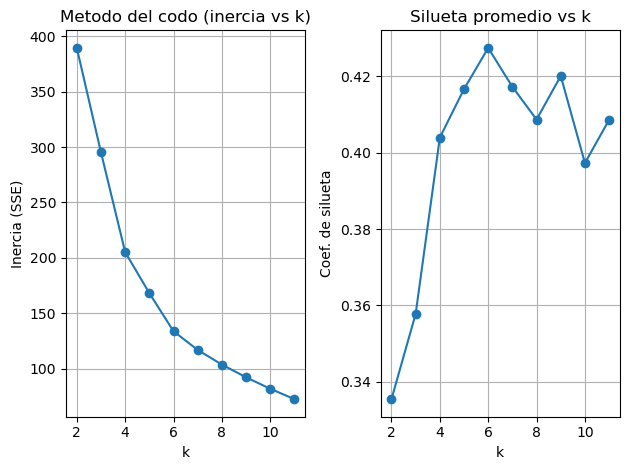

In [18]:
#Graficar heuristicas
plt.subplot(1,2,1)
plt.plot(list(ks), inertias, marker="o")
plt.title("Metodo del codo (inercia vs k)")
plt.xlabel("k")
plt.ylabel("Inercia (SSE)")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(list(ks), silhouettes, marker = "o")
plt.title("Silueta promedio vs k")
plt.xlabel("k")
plt.ylabel("Coef. de silueta")
plt.grid(True)

plt.tight_layout()
plt.show()


In [7]:
#Eleccion del k optimo (silueta maxima) o codo:
#np.armax devuelve el indice de v_max -> en este caso
#el indice es la cant de grupos.
best_k = ks[int(np.argmax(silhouettes))]

In [8]:
#Entrenar modelo
kmeans = KMeans(n_clusters=best_k, init='k-means++', n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

print(f"Inercia:{kmeans.inertia_}")
print(f"Silueta:{silhouette_score(X_scaled, labels)}")

Inercia:133.86833362685582
Silueta:0.42742814991580175


In [9]:
#Interpretar: centroides (en escala original)
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=features)
sizes = pd.Series(labels).value_counts().sort_index()

print(f"Centroides (unidades originales):\n{centroids_df.round(2)}\n")
print(f"Tamaño de clusters:\n{sizes}")


Centroides (unidades originales):
     Age  Annual Income (k$)  Spending Score (1-100)
0  41.94               88.94                   16.97
1  56.33               54.27                   49.07
2  25.25               25.83                   76.92
3  32.69               86.54                   82.13
4  26.68               57.58                   47.79
5  45.52               26.29                   19.38

Tamaño de clusters:
0    33
1    45
2    24
3    39
4    38
5    21
Name: count, dtype: int64


In [10]:
#Añadir etiquedas al df original
df_cluster = df.copy()
df_cluster["Cluster"] = labels

df_cluster.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


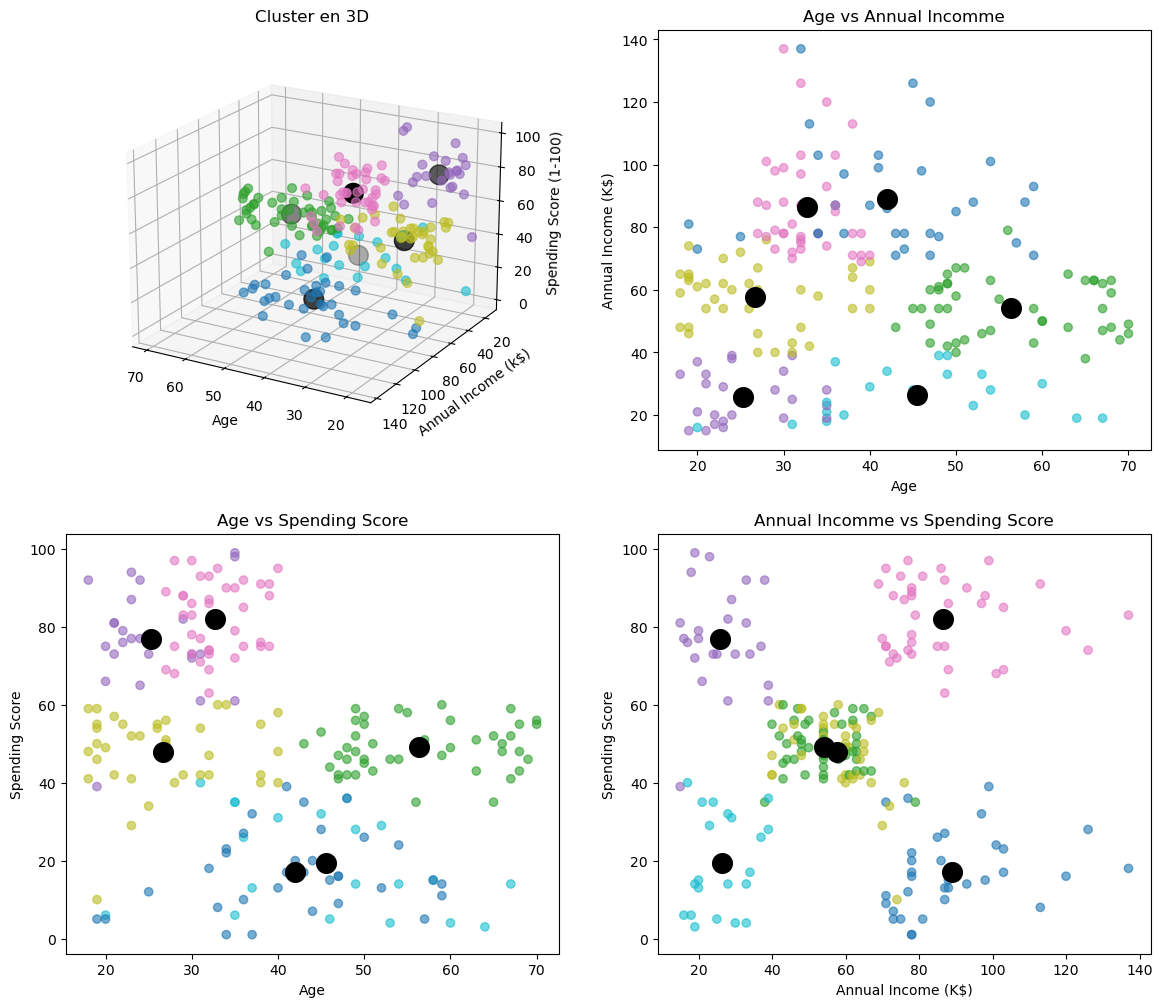

In [11]:
x = df_cluster["Age"]
y = df_cluster["Annual Income (k$)"]
z = df_cluster["Spending Score (1-100)"]

#Color map de 6:

cmap = plt.colormaps['tab10'].resampled(6)


#Crear figura general
fig = plt.figure(figsize=(14,12))

# --- Subplot 1: Grafico 3D completo --
ax1 = fig.add_subplot(2,2,1,projection = '3d')

ax1.scatter3D(x,y,z,c = labels, cmap = cmap, s = 40, alpha = 0.6)

ax1.scatter3D(
    centroids_original[:,0],
    centroids_original[:,1],
    centroids_original[:,2],
    c='black',
    s=200,
    marker='o',
    label='Centroides'
)

ax1.set_xlabel("Age")
ax1.set_ylabel("Annual Income (k$)")
ax1.set_zlabel("Spending Score (1-100)")
ax1.set_title("Cluster en 3D")
ax1.view_init(elev=20, azim=120)

# --- Subplot 2: Age vs Income --
ax2 = fig.add_subplot(2,2,2)

ax2.scatter(x, y, c=labels, cmap=cmap, alpha=0.6)
ax2.scatter(
    centroids_original[:,0], 
    centroids_original[:,1], 
    c="black",
    s=200,
    marker='o')

ax2.set_xlabel("Age")
ax2.set_ylabel("Annual Income (K$)")
ax2.set_title("Age vs Annual Incomme")

# --- Subplot 3: Age vs Spending Score --
ax2 = fig.add_subplot(2,2,3)

ax2.scatter(x, z, c=labels, cmap=cmap, alpha=0.6)
ax2.scatter(
    centroids_original[:,0], 
    centroids_original[:,2], 
    c="black",
    s=200,
    marker='o')

ax2.set_xlabel("Age")
ax2.set_ylabel("Spending Score")
ax2.set_title("Age vs Spending Score")

# --- Subplot 4: Age vs Income --
ax2 = fig.add_subplot(2,2,4)

ax2.scatter(y, z, c=labels, cmap=cmap, alpha=0.6)
ax2.scatter(
    centroids_original[:,1], 
    centroids_original[:,2], 
    c="black",
    s=200,
    marker='o')

ax2.set_xlabel("Annual Income (K$)")
ax2.set_ylabel("Spending Score")
ax2.set_title("Annual Incomme vs Spending Score")

plt.show()

1. Los algoritmos basados en distancia euclideana, como K-Means, no admiten datos no numéricos. ¿Qué columna quitaría del análisis?




Para poder realizar el clustering se quitan los datos de:
* Id: ya que no me aporta informacion para el analisis. 
* Genero: ya que es un tipo de dato string y no puede utilizarse para el calculo de distancias.

Ya que se desean planificar estrategias de venta, las features adecuedas son:
* La edad de los clientes (**Age**)
* Ingreso Anual (**Annual Income**)
* Puntuacion de gasto (**Spending Score**)

1. **¿Los clientes con mayor ingresos anuales son los que más gastan?**


In [12]:
print(f"Centroides:\n{centroids_df.round(2)}")

Centroides:
     Age  Annual Income (k$)  Spending Score (1-100)
0  41.94               88.94                   16.97
1  56.33               54.27                   49.07
2  25.25               25.83                   76.92
3  32.69               86.54                   82.13
4  26.68               57.58                   47.79
5  45.52               26.29                   19.38


En el grafico de Ingreso anual (Annual Income) vs Puntuacion de gastos (Spending Score) podemos ver que :

* No hay una relacion directa de mayor ingreso, mayor gasto. 
* El grupo de clientes con mayor ingreso (**88.94**) es el que menor puntuacion de gasto tiene (**16.97**) en promedio.
* A su vez, el 2do grupo de clientes con mayor ingreso (**83.54**) son los que tienen el mayor gasto (**82.13**), 
* Sin embargo podemos observar que el grupo con menores ingresos (**25.86**) en promedio tiene un nivel de gasto muy parecido al 2do grupo de mayores ingresos.

2. **¿Los clientes de mayor edad, con mayor ingreso anual, son los que menos gastan?**

Podemos observar en los graficos de Edad (Age) vs Puntuacion de gastos(Spending Score) y Edad (Age) vs Ingreso Anual (Annual Income) que:

* Los clientes de menor edad media (**25** años), con el menor ingreso (**25.83**) son los segundos que mas gastos hacen.
* Los clientes de edad media de **42** años son los que mayores ingresos (**88.94**) tienen y los que menos gastos hacen. 
* Los clientes con mayor edad (**56** años), son los que tienen un ingreso anual (**54.27**) intermedio  entre el mayor y menor ingreso, y ademas son los que tienen un nivel de gasto medio.

Por lo tanto:

* Los clientes de mayor edad, entre ellos lo de mayor ingreso, tienen un nivel de gasto intermedio.
* Los clientes de edad intermedia, con mayor ingreso, son los que menos gastan.


###**Preguntas:**
- ¿Qué impacto pueden tener los outliers en el resultado del clustering?


Cuando se realiza clustering con K-Means debemos verificar que no haya valores alejados en el set de datos, ya que este algoritmo es muy sensible a los mismos.

El algoritmo K-Means realiza el calculo de los centroides de los clusters utilizando la **media** de las distancias de los puntos al centroide. 

Esta medida posicion, es es sencible a los valores alejados ya que solo uno de ellos puede desplazar significativamente el centroide del cluster hacia el. 

Este desplazamiento provoca una distorcion en el cluster, ya que puntos que deberian pertenecer a este grupo, quedan mas cerca de otros centroides y son asignados incorrectamente a ese grupo.

De igual forma, otros puntos que no son similares al grupo, pueden ser agregados de forma erronea, solo por el hecho de que el valor alejado desplazo el centroide.



- ¿Qué podría pasar si una variable está en una escala mucho mayor que las demás? Dar un ejemplo. ¿Es necesario normalizar o escalar los datos siempre?

En el caso de que una variable tenga una escala mucho mayor que las demas, esta dominara el calculo de las distancias calculadas y utilizadas por K-Means.

El aporte de las variables (features) de menor escala, seran despreciable frente a la variable de mayor escala.

Entonces los centroides se estableceran en base a esta variable, que es la que tiene mayor magnitud, y esto genera un sesgo en la posicion de los cluster, ya que se reduce la influencia de las variables de menor magnitud. 

De esta forma K-Means agruparia los datos casi considerando esa una variable, dejando de lado las demas aunque tambien tengan informacion relevante.

En el caso de clastering o algoritmos que dependen de distancias ecludianas, siempre es necesario escalar por 2 motivos: 

* El escalado garantiza que todas las variables tengan la misma importancia numerica, y de esta forma evitamos que las features de mayor magnitud dominen el calculo de la distancia.
De esa forma eliminamos el sesgo que se introduciria por la diferencia de magnitudes entre las features.

* Incluso si las variables estan en el mismo orden de magnitud, escalar nos permite eliminar las unidades y quedarnos con datos adimensionales y homogeneos, de esa forma evitamos mezclar magnitudes incompatibles.

En sistencis, escalar nos garantiza que todas las varibales sean tenidas en cuenta a la hora de formas los grupos y ademas trabajamos con datos adimensionales y homogeneos, evitando inconsistencias matematicas al realizar operaciones de elementos con unidades diferentes.


- ¿Qué significa la inercia en el contexto de K-Means?

La inercia es la suma de las distancias al cuadrado de cada punto a su centroide correspondiente.

Un valor de inercia bajo indica que los puntos estan muy juntos y cerca de su centroide, lo cual es bueno, ya que indica que los puntos estan bien agrupados.

La inercia nos da una idea de la compactacion de los puntos respecto su centroide. 

- ¿Por qué la inercia siempre disminuye al aumentar el número de clusters k? ¿Qué puede decir respecto de la inercia vs. el número de clusters?

Al tener un mayor numero de clusters, los puntos se distribuyen en mayor cantidad de grupos. 
Ahora cada grupo tiene menos puntos.

Por ende, a la hora de calcular la inercia para un determinado cluster, tendremos menos puntos, con respecto a si hubiese menos clusters. 

Al tener menos puntos, la suma de la distancia al cuadrado de cada punto a su centroide sera menor, resultando una inercia menor. 

Entonces al aumentar el numero de clusters, la inercia disminuye ya que los puntos estan agrupando en base a caracteristicas similares, en vez de tener grupos con puntos heterogeneos. 

Sin embargo llega un punto en que aumentar el numero de clusters, no mejora significativamente la inercia, por lo que llegamos a un punto de rendimiento decreciente. 

Ese numero de cluster en el cual, luego de agregar mas no mejora la inercia, es la cantidad de clusters optimo.

Esta euristica es conocida como metodo del codo.
